# Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from data import build_features as bf
from data import process_data as pd
from learning_library import logistic_regression as lr

# One Feature: Tumor Radius

The breast tumor dataset contains 10 features, which are described in the wdbc.names file. We will begin by building a binary classification model using logistic regression with the use of the first feature - the tumor radius, measured in mm.

### Data Visualization

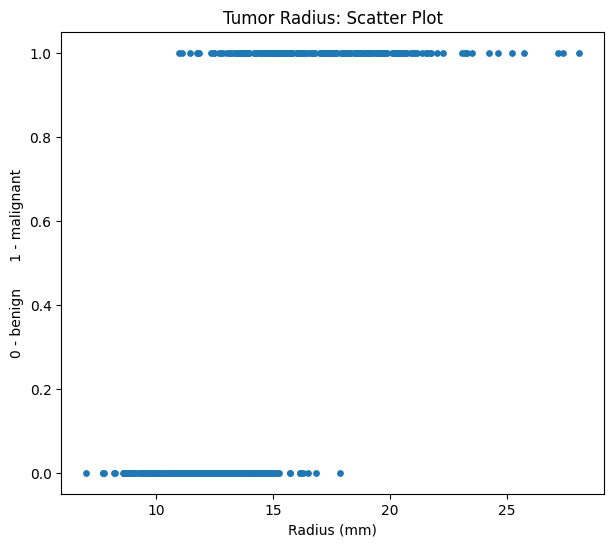

In [2]:
# Obtain X and y data as numpy arrays
X, y = pd.generate_data()

# Scatter plot of first feature - tumor radius
def one_feature_plot(title):
    plt.figure(figsize = (7, 6))
    plt.scatter(X[:, 0], y, s=15)
    plt.xlabel("Radius (mm)")
    plt.ylabel("0 - benign      1 - malignant")
    plt.title(title)
one_feature_plot("Tumor Radius: Scatter Plot")

Here we can observe that tumors with a larger radius are more likely to be malignant. However, there's many tumors within the 12-15mm region that are both benign and malignant. We can thus proceed with a logistic regression model based on just the tumor radius and see how it performs.

### Training

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.3071493368540068
Iteration: 100  Cost: 0.2947636097385642
Iteration: 150  Cost: 0.2919053677705007
Iteration: 200  Cost: 0.2910012272645789
Iteration: 250  Cost: 0.2906751366753254
Iteration: 300  Cost: 0.290549262505185
Iteration: 350  Cost: 0.29049875194061786
Iteration: 400  Cost: 0.2904780041406813
Iteration: 450  Cost: 0.2904693572252389


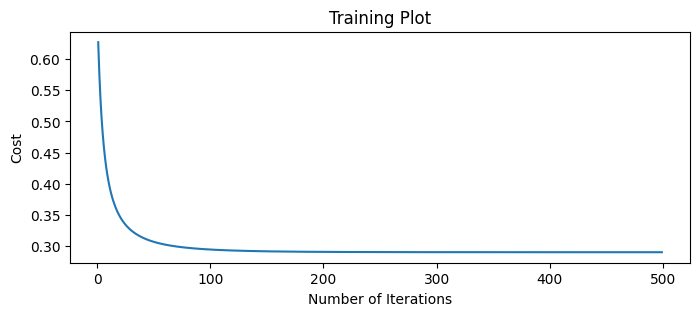

In [3]:
# To start, we obtain a 90% train/test split of our data
X_train_1, X_test_1, y_train, y_test = bf.training_data(X, y, [0])
plt.figure(figsize = (8, 3))
w_vec_1, b_1 = lr.gradient_descent(500, X_train_1, y_train, 0.5, 0)

### Performance

In [4]:
# Evaluate logistic regression model accuracy
lr.predict(X_test_1, y_test, w_vec_1, b_1)

Parameters of model are: [3.56094083] and -0.6973616768241013
Model accuracy is 84.211%


### Decision Boundary Visualization

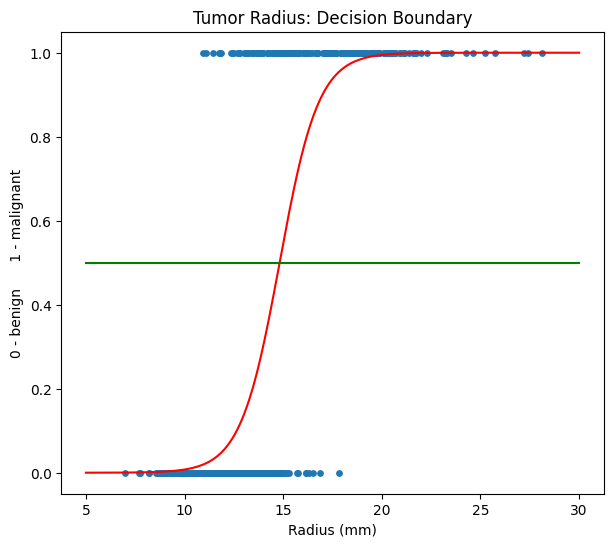

In [21]:
one_feature_plot("Tumor Radius: Decision Boundary")
mu_0, std_0 = np.mean(X[:, 0], axis=0), np.std(X[:, 0], axis=0)
in_radius = np.linspace(5, 30, 200)
in_radius_norm = bf.normalize(in_radius, mu_0, std_0)
out_1 = lr.sigmoid(w_vec_1*in_radius_norm + b_1)
bound_1 = np.ones(200)*0.5
plt.plot(in_radius, out_1, color="red")
plt.plot(in_radius, bound_1, color="green")
plt.show()

### Evaluation

Our logistic regression model had an accuracy of 84.211%, which is quite satisfactory for just one linear feature. We can see the logistic model along with the decision boundary above. As calculated, this model predicts that any tumor with a radius greater than 14.8 is malignant, and those smaller are benign. As our data contains 10 features, we will now add another feature (Tumor Compactness), and see if we can lower the model cost and improve its accuracy.

# Two Features: Tumor Radius and Compactness

We will now add a second feature - Tumor Compactness. This feature is calculated as the tumor perimeter squared divided by the area of the tumor minus 1. 

### Data Visualization

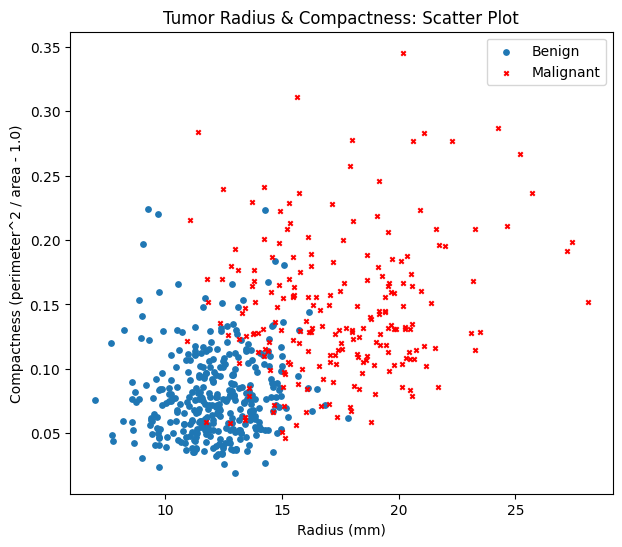

In [6]:
# Scatter plot of radius and texture
def malignant(i): return bool(i)
def benign(i): return not(bool(i))
mal, ben = np.vectorize(malignant)(y), np.vectorize(benign)(y)
X_mal_2, X_ben_2 = X[:, [0, 5]][mal], X[:, [0, 5]][ben]
def two_feature_plot(title):
    plt.figure(figsize = (7, 6))
    plt.scatter(X_ben_2[:, 0], X_ben_2[:, 1], marker="o", s=15, label="Benign")
    plt.scatter(X_mal_2[:, 0], X_mal_2[:, 1], marker="x", s=10, color="red", label="Malignant")
    plt.xlabel("Radius (mm)")
    plt.ylabel("Compactness (perimeter^2 / area - 1.0)")
    plt.legend()
    plt.title(title)
two_feature_plot("Tumor Radius & Compactness: Scatter Plot")
plt.show()

As we see in the scatterplot, there are many outliers, but we can see an overall trend that tumors with large radius and compactness are more likely to be malignant. Hence, these two features would be a decent candidate for logistic regression. From the plot, it seems that a straight line decision boundary would be sufficient, so we will begin by using a linear feature model, then also test whether the square feature model performs better.

### Training - Linear Feature Model

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.23554056763664286
Iteration: 100  Cost: 0.22235169300964355
Iteration: 150  Cost: 0.21886432525657062
Iteration: 200  Cost: 0.2175949357535948
Iteration: 250  Cost: 0.217065228758224
Iteration: 300  Cost: 0.2168272024219311
Iteration: 350  Cost: 0.2167153554872833
Iteration: 400  Cost: 0.2166612718845611
Iteration: 450  Cost: 0.21663461679537124


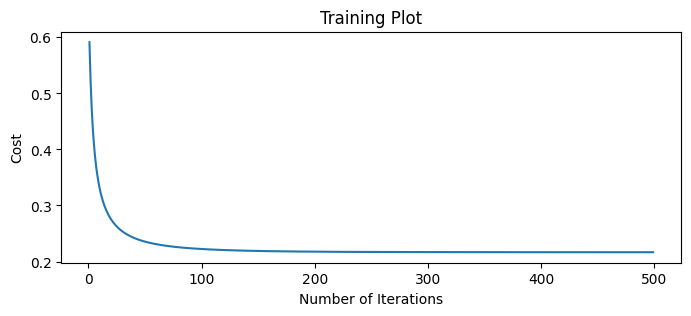

In [7]:
# Train a linear feature logistic regression model
X_train_2_lin, X_test_2_lin, y_train, y_test = bf.training_data(X, y, [0, 5])
plt.figure(figsize = (8, 3))
w_vec_2_lin, b_2_lin = lr.gradient_descent(500, X_train_2_lin, y_train, 0.5, 0)

### Performance - Linear Feature Model

In [8]:
# Evaluate linear feature logistic regression model accuracy
lr.predict(X_test_2_lin, y_test, w_vec_2_lin, b_2_lin)

Parameters of model are: [3.39542593 1.72061214] and -0.7511440597220752
Model accuracy is 85.965%


As we can see, we were able to significantly improve our model by adding tumor compactness. While the model accuracy only increased by 1.75%, we have a significant decrease in the model cost. Our one feature model had a final cost of 0.290 compared to 0.217 for our two feature model. It's important to note that we utilize the logistic loss function when computing the cost. We cannot use least squares in this case as the function is not convex for logistic regression, so the gradient descent algorithm would not work as it usually won't always find the global minimum and get stuck in some local minimum.

### Decision Boundary Visualization

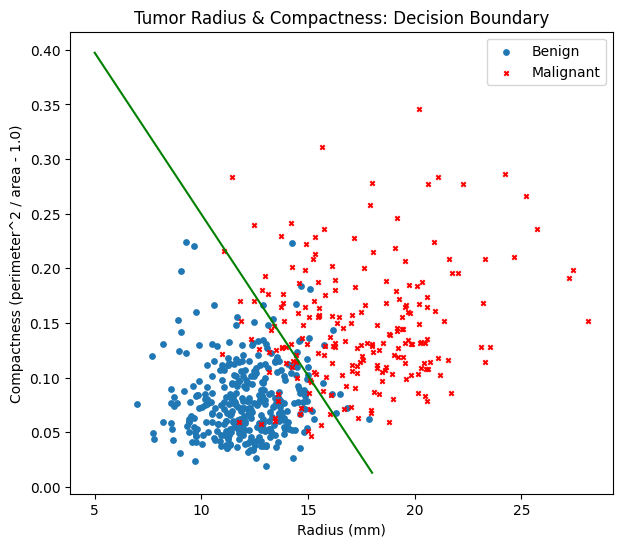

In [9]:
two_feature_plot("Tumor Radius & Compactness: Decision Boundary")
mu_5, std_5 = np.mean(X[:, 5], axis=0), np.std(X[:, 5], axis=0)
in_radius = np.linspace(5, 18, 200)
in_radius_norm = bf.normalize(in_radius, mu_0, std_0)
bound_2 = (-std_5/w_vec_2_lin[1])*(b_2_lin + w_vec_2_lin[0]*in_radius_norm) + mu_5
plt.plot(in_radius, bound_2, color="green")
plt.show()

Above we can see the linear decision boundary. This model will predict any tumor to the right of the line as malignant, and those to the left as benign. We will now utilize a squared feature model resulting in a curved decision boundary, to see if we can improve the models accuracy.

### Training - Square Feature Model

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.22250295912826606
Iteration: 100  Cost: 0.21815342884911648
Iteration: 150  Cost: 0.21741052997568794
Iteration: 200  Cost: 0.21723450437518826
Iteration: 250  Cost: 0.2171812649753097
Iteration: 300  Cost: 0.21715804087138743
Iteration: 350  Cost: 0.21714262482812224
Iteration: 400  Cost: 0.21712935683201307
Iteration: 450  Cost: 0.217116748182395


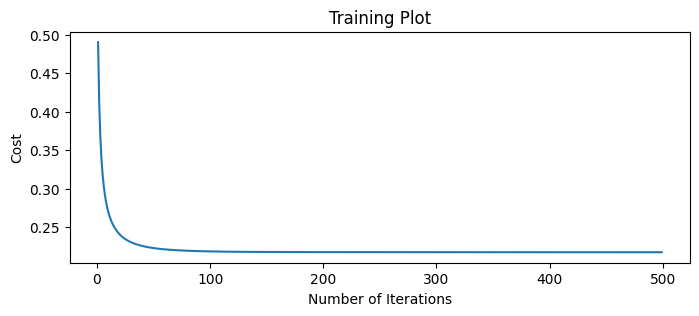

In [10]:
# Train a square feature logistic regression model
X_train_2_sq, X_test_2_sq, y_train, y_test = bf.training_data(X, y, [0, 5], model=2)
plt.figure(figsize = (8, 3))
w_vec_2_sq, b_2_sq = lr.gradient_descent(500, X_train_2_sq, y_train, 0.5, 0)

### Performance - Square Feature Model

In [11]:
# Evaluate square feature logistic regression model accuracy
lr.predict(X_test_2_sq, y_test, w_vec_2_sq, b_2_sq)

Parameters of model are: [1.6849326  0.74511096 1.60502431 0.9377641  0.41638299] and -0.4824142678314989
Model accuracy is 85.965%


As calculated, the model accuracy for the squared model is exactly the same as that of the linear feature model. The associated cost is also nearly identical (0.2171 for the squared model compared to 0.2166 for the linear model). We will now again add another feature - tumor texture, and see how it affects our model.

# Three Features: Radius, Texture, Compactness

We are now adding a third feature - tumor texture. This feature is calculated as the standard deviation of grayscale values for each tumor

### Data Visualization

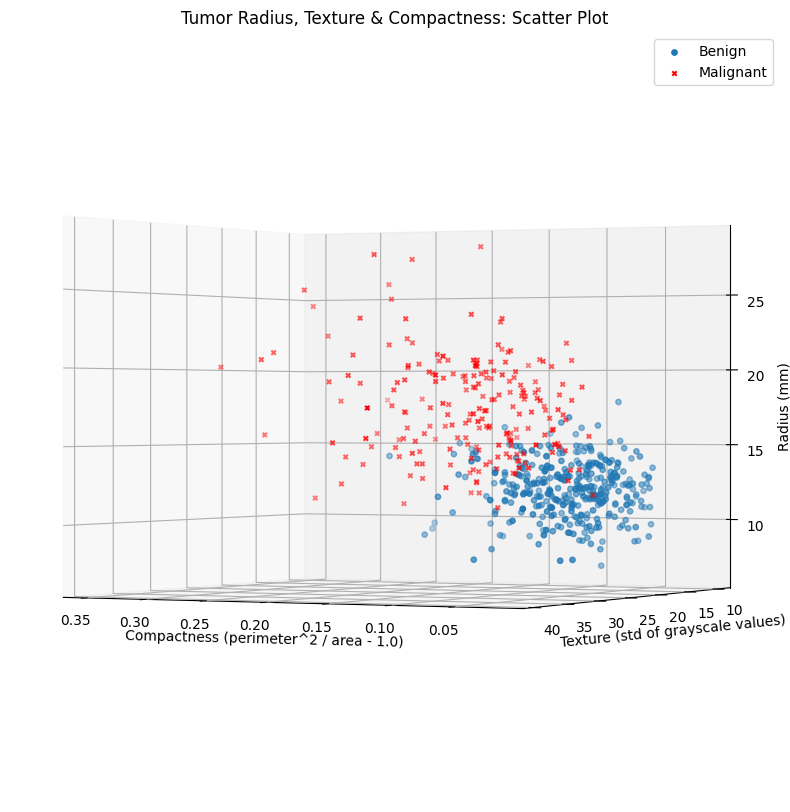

In [12]:
X_mal_3, X_ben_3 = X[:, [5, 1, 0]][mal], X[:, [5, 1, 0]][ben]
plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
def three_feature_plot(title):
    ax.scatter3D(X_ben_3[:, 0], X_ben_3[:, 1], X_ben_3[:, 2], marker="o", s=15, label="Benign")
    ax.scatter3D(X_mal_3[:, 0], X_mal_3[:, 1], X_mal_3[:, 2], marker="x", s=10, color="red", label="Malignant")
    plt.xlabel("Compactness (perimeter^2 / area - 1.0)")
    plt.ylabel("Texture (std of grayscale values)")
    ax.set_zlabel("Radius (mm)")
    plt.title(title)
    plt.legend()
three_feature_plot("Tumor Radius, Texture & Compactness: Scatter Plot")
ax.view_init(0, 117)
plt.show()

As we can see in the 3D visualization, the data seems to work really well for classification. We can only observe a few outliers and there seems to be a clear decision boundary seperating the two groups, so these three features are perfect for our classification model. We will start by building training and assessing a linear feature model.

### Training - Linear Feature Model

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.20918283755002762
Iteration: 100  Cost: 0.19490710819615986
Iteration: 150  Cost: 0.1907970019141309
Iteration: 200  Cost: 0.18916460281220998
Iteration: 250  Cost: 0.18841857706138454
Iteration: 300  Cost: 0.1880500944464567
Iteration: 350  Cost: 0.18785911093214466
Iteration: 400  Cost: 0.1877569184456798
Iteration: 450  Cost: 0.18770102091150964


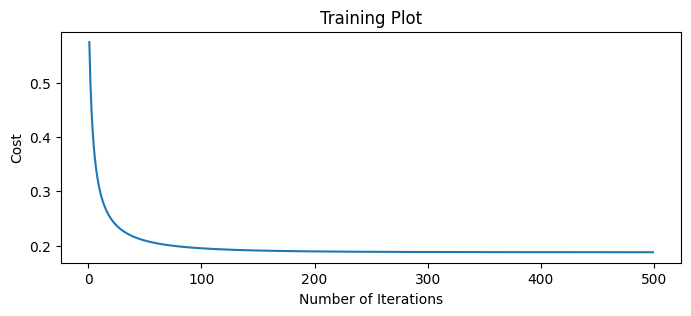

In [13]:
X_train_3_lin, X_test_3, y_train, y_test = bf.training_data(X, y, [0, 1, 5])
plt.figure(figsize = (8, 3))
w_vec_3_lin, b_3_lin = lr.gradient_descent(500, X_train_3_lin, y_train, 0.5, 0)

### Performance - Linear Feature Model

In [14]:
# Evaluate linear feature logistic regression model accuracy
lr.predict(X_test_3, y_test, w_vec_3_lin, b_3_lin)

Parameters of model are: [3.38662404 1.04152602 1.86688865] and -0.8250129728243067
Model accuracy is 89.474%


As expected, this three feature model performs much better than our two feature model. We have further decreased our cost (from 0.217 to 0.188), and improved out accuracy (85.97% to 89.47%)

### Decision Boundary Visualization

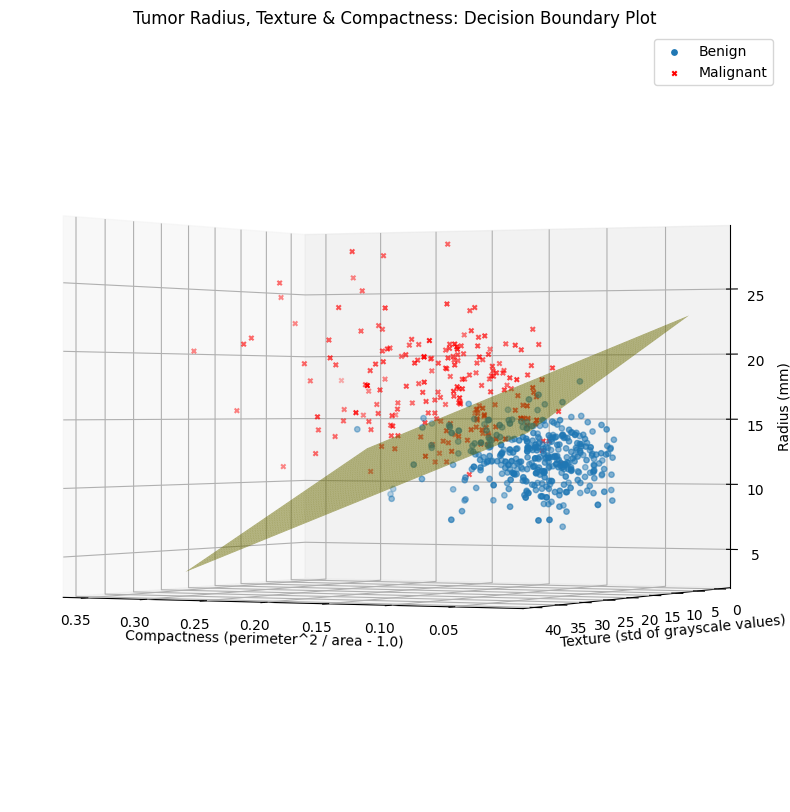

In [15]:
plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
three_feature_plot("Tumor Radius, Texture & Compactness: Decision Boundary Plot")
mu_1, std_1 = np.mean(X[:, 1], axis=0), np.std(X[:, 1], axis=0)
in_compact = np.linspace(0.02, 0.30, 200)
in_texture = np.linspace(0, 35, 200)
Compact, Texture = np.meshgrid(in_compact, in_texture)
Radius = (-std_0/w_vec_3_lin[0])*(b_3_lin + w_vec_3_lin[1]*((Texture-mu_1)/std_1) + w_vec_3_lin[2]*((Compact-mu_5)/std_5)) + mu_0
ax.plot_surface(Compact, Texture, Radius, color="yellow", alpha=0.57)
ax.view_init(0, 117)
plt.show()

Above we can see the decision boundary for the three feature model. As we utilized linear features, this decision boundary is a three-dimensional plane. All points above this plane are categorized as malignant whereas those below benign. We will again attempt to improve our accuracy, by now utilizing both squared and cubic features.

### Training - Squared and Cubic Feature Model

Iteration: 0  Cost: 0.6931471805599468
Iteration: 50  Cost: 0.18915745992128422
Iteration: 100  Cost: 0.1876004588498763
Iteration: 150  Cost: 0.18718245427753794
Iteration: 200  Cost: 0.18689614648792782
Iteration: 250  Cost: 0.18663737366796998
Iteration: 300  Cost: 0.18639183701225465
Iteration: 350  Cost: 0.18615724425071178
Iteration: 400  Cost: 0.1859328775310301
Iteration: 450  Cost: 0.1857181752961407


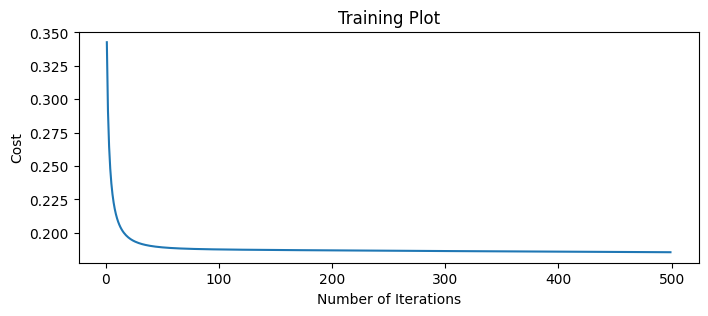

In [16]:
X_train_3_cub, X_test_3, y_train, y_test = bf.training_data(X, y, [0, 1, 5], model=3)
plt.figure(figsize = (8, 3))
w_vec_3_cub, b_3_cub = lr.gradient_descent(500, X_train_3_cub, y_train, 0.5, 0.1)

### Performance - Squared and Cubic Feature Model

In [17]:
# Evaluate squared and cubic feature logistic regression model accuracy
lr.predict(X_test_3, y_test, w_vec_3_cub, b_3_cub)

Parameters of model are: [ 0.70830232  0.57813901  0.66818271  0.65817579  1.02883763  0.5129551
 -0.3392232   0.70185667  0.32086064  0.65817579  0.51674189  0.51674189
  0.3538749   0.22184474  0.13802414  0.09106773  0.03509577  0.02932705
  0.02276648] and -0.15790677518669896
Model accuracy is 89.474%


As we can see, the cubic feature model performs only marginally better. It's important to note that in training this model, we have utilized ridge regularization to account for any potential overfitting. Ridge regularization works by adding an additional term to our cost function, which penalizes the models paramters to prevent model overfitting.

# Ten Features: Utilizing All Features

We will now use all features provided to us:


a) radius (mean of distances from center to points on the perimeter)    
b) texture (standard deviation of gray-scale values)    
c) perimeter    
d) area 
e) smoothness (local variation in radius lengths)   
f) compactness (perimeter^2 / area - 1.0)   
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)   
i) symmetry      
j) fractal dimension ("coastline approximation" - 1)    


As we are now working in 10 dimensions, it's important to utilize ridge regularization, as the model can easily overfit to the data.

### Training - Ten Feature Model

Iteration: 0  Cost: 0.6931471805599468
Iteration: 300  Cost: 0.1404443277478626
Iteration: 600  Cost: 0.13933859793002315
Iteration: 900  Cost: 0.13901682376075086
Iteration: 1200  Cost: 0.1388640456277498
Iteration: 1500  Cost: 0.1387674548722881
Iteration: 1800  Cost: 0.1386954500626347
Iteration: 2100  Cost: 0.13863653248548125
Iteration: 2400  Cost: 0.13858560108509135
Iteration: 2700  Cost: 0.13854009572512357


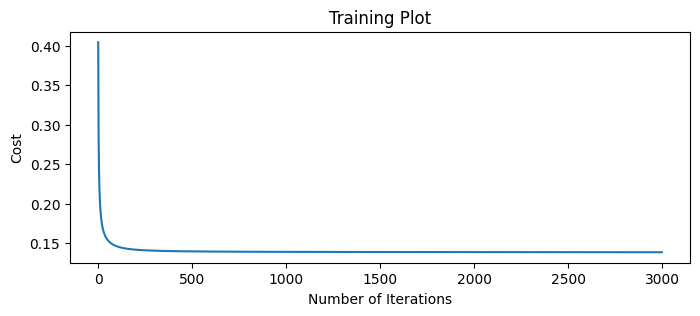

In [43]:
X_train_10, X_test_10, y_train, y_test = bf.training_data(X, y, np.arange(10))
plt.figure(figsize = (8, 3))
w_vec_10, b_10 = lr.gradient_descent(3000, X_train_10, y_train, 0.5, 0.1)

### Performance - Ten Feature Model

In [45]:
# Evaluate 10 feature logistic regression model accuracy
lr.predict(X_test_10, y_test, w_vec_10, b_10)

Parameters of model are: [ 0.89629517  1.52616864  0.72524265  2.06126683  1.06950823 -0.64965948
  1.03263973  2.04870211  0.45548431 -0.20925799] and -0.5697579594795996
Model accuracy is 96.491%


Finally, we can see that our 10 feature model has a significant improvement compared to that of the three feature model. Our cost went down (from 0.186 to 0.139) and our model accuracy is now 96.49% (up from 89.47%).